# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
data = pd.io.stata.read_stata\
('/home/roman/Documents/Projects/Springboard/8.3 EDA/EDA_racial_discrimination/data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w']['call'])

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


#### 1. What test is appropriate for this problem? Does CLT apply?

In [5]:
n_b = len(data[data.race=='b']['call'])
c_b = sum(data[data.race=='b']['call'])
p_b = c_b / n_b
n_w = len(data[data.race=='w']['call'])
c_w = sum(data[data.race=='w']['call'])
p_w = c_w / n_w
print('black: percentage callbacks: ' + str(round(100 * p_b, 2)) + '%, number of callbacks: ' + \
      str(int(c_b)) + ', number of cases: ' + str(n_b))
print('white: percentage callbacks: ' + str(round(100 * p_w, 2)) + '%, number of callbacks: ' + \
      str(int(c_w)) + ', number of cases: ' + str(n_w))

black: percentage callbacks: 6.45%, number of callbacks: 157, number of cases: 2435
white: percentage callbacks: 9.65%, number of callbacks: 235, number of cases: 2435


CLT applies because the number of trials is large enough (>30) and the number of expeced poitive and negative trials is each expected to be greater than 10. Due to the large sample size the binomial distribution can be approximated with the normal distribution. A two-sample z-test is therefore appropriate. 

#### 2. What are the null and alternate hypotheses?
("blacks" and "whites" refer to "black sounding names" and "white sounding names", respectively)
- Null hypothesis: the proportion of callbacks for blacks and whites is equal: H_0: p_w = p_b
- Alternative hypothesis: the proportion of callbacks for whites is higher than the on for blacks: H_A: p_w > p_b

#### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']
##### Bootstrapping method:
diff_act = np.float64(c_w - c_b)
diff_perm = []
for _ in range(100000):
    call_perm = np.random.permutation(data['call'])
    w_perm = call_perm[:len(w)]
    b_perm = call_perm[len(w):]
    diff_perm.append(sum(w_perm) - sum(b_perm))

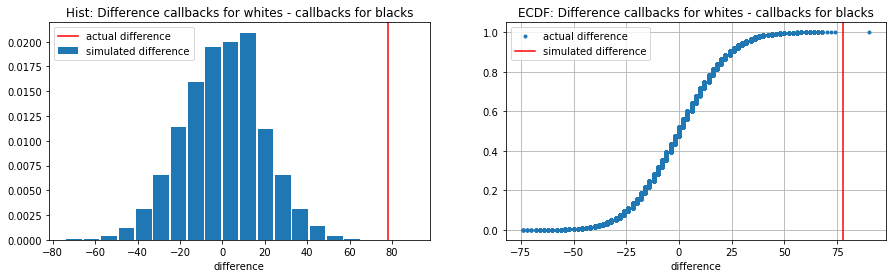

Actual difference callbacks white - callbacks black: 78.0
95% CI permutation method: [-36.  38.]
P-value permutation method: 1e-05


In [7]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y
x, y = ecdf(diff_perm)
rcParams['figure.figsize'] = 15, 4
plt.subplot(1,2,1)
plt.hist(diff_perm, bins=20, rwidth=0.9, density=True)
plt.axvline(diff_act, color='red')
plt.title('Hist: Difference callbacks for whites - callbacks for blacks')
plt.legend(['actual difference', 'simulated difference'])
plt.xlabel('difference')
plt.subplot(1,2,2)
plt.plot(x, y, marker='.', linestyle='none')
plt.axvline(diff_act, color='red')
plt.grid()
plt.title('ECDF: Difference callbacks for whites - callbacks for blacks')
plt.legend(['actual difference', 'simulated difference'])
plt.xlabel('difference')
plt.show()
p_perm = sum(diff_perm > diff_act) / len(diff_perm)
print('Actual difference callbacks white - callbacks black: ' + str(diff_act))
print('95% CI permutation method: ' + str(np.percentile(diff_perm, [2.5, 97.5])))
print('P-value permutation method: ' + str(p_perm))

In [8]:
##### Z-test
sigma = np.sqrt((n_w * p_w * (1 - p_w)) + (n_b * p_b * (1 - p_b)))
diff_H_0 = 0
z = ((c_w - c_b) - diff_H_0) / sigma
p_ztest = 1 - stats.norm.cdf(z)
h = 1.96 * sigma
print('Actual difference callbacks white - callbacks black: ' + str(diff_act))
print('95% CI Z-test: ' + str([-h, h]))
print('P-value Z-test: ' + str(p_ztest))

Actual difference callbacks white - callbacks black: 78.0
95% CI Z-test: [-37.14691446197348, 37.14691446197348]
P-value Z-test: 1.9312826037620745e-05


#### 4. Write a story describing the statistical significance in the context or the original problem.
The P-value of the permuation as well as the z-test suggest that race has a highly significant impact on the rate of callbacks for resumes. To not reject the null hypothesis that the number of callback is equal between both groups, the difference should be between -38 and 38. However, people with white sounding names received 78 more callbacks than people with black sounding names. The P-value of 1.9e-5 in the Z-test suggests that only in 1 out of approximately 193,000 samples the difference between white and black callbacks should be that large. Since we only ran 100000 samples for the permutation test, it is not surprising that there was no example of a difference higher than 78.

Also important to note is that this result does not necessarily mean that decisions were made based on race. There are several other attributes may have an influence on the decision on whether an applicant is being called back or not. It could for example be that the level of education is highly correlated with the categorical distinction of whites vs blacks and that the decisions were made based on education level rather than race. If that were the case, other studies, such as if blacks have less access to good education, should be conducted.

#### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
To investigate which factor was most important when deciding whether a candidate gets called back, I conduct a correlation analysis. (Note that some cateorical attributes such as 'city' have been excluded from this analysis)

In [9]:
##### Investigate correlation - create dummy variables for race and sex 
df_dummies_race = pd.get_dummies(data['race']).iloc[:, -1]
df_dummies_sex = pd.get_dummies(data['sex']).iloc[:, -1]
del data['race']
del data['sex']
data_new = pd.concat([data, df_dummies_race, df_dummies_sex], axis=1)
new_columns = data_new.columns.values
new_columns[-2] = 'race'
new_columns[-1] = 'sex'
data_new.columns = new_columns

In [155]:
data_new.corr()['call'].sort_values(ascending=False)

call                  1.000000
specialskills         0.111074
honors                0.071951
empholes              0.071888
adid                  0.063178
yearsexp              0.061436
race                  0.058872
linc                  0.049649
offsupport            0.047783
lmedhhinc             0.047699
fraccolp              0.047016
occupspecific         0.040548
parent_emp            0.039060
othservice            0.036114
transcom              0.035558
fracwhite             0.035148
occupbroad            0.034536
fraccolp_empzip       0.026118
email                 0.025880
h                     0.025835
fed                   0.014471
fracdropout_empzip    0.013951
fracblack_empzip      0.009882
parent_sales          0.008430
volunteer             0.007197
linc_empzip           0.006883
busservice            0.006882
secretary             0.004038
eoe                   0.003092
comreq                0.002421
retailsales           0.002336
ofjobs                0.002311
educatio

The correlation analysis suggests that special skills and honors have the strongest correlations with call and are therefore the most important features. Race seems to be the seventh most important factor.